In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import statsmodels.api as sm
from utils.normalize import normalize

# plot de euronext IPO's per jaar

Error creating monthly IPO plot: 'Axes' object has no attribute 'show'


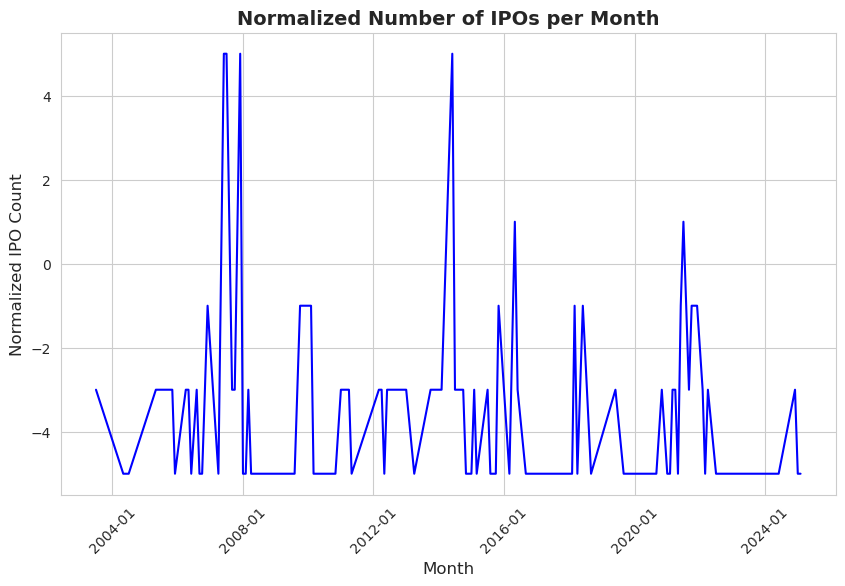

In [ ]:
from iposcraper import ipo_df
from utils.plot_line import plot_line_graph

def plot_monthly_ipos(ipo_df):
    try:
        # Make sure IPOdate is in datetime format
        ipo_df["IPOdate"] = pd.to_datetime(ipo_df["IPOdate"])
        ipo_df = ipo_df.sort_values('IPOdate')
        
        # Group by year and month and count IPOs
        ipo_df['Year_Month'] = ipo_df['IPOdate'].dt.to_period('M').dt.to_timestamp()
        monthly_series = ipo_df.groupby('Year_Month').size()
        monthly_counts = monthly_series.reset_index(name='Count')

        monthly_counts = normalize(monthly_counts, "Count")

        # Use the plot_line_graph function for plotting
        _, plt = plot_line_graph(
            df=monthly_counts, 
            x_column='Year_Month', 
            y_column='normalized_Count',
            title='Normalized Number of IPOs per Month',
            xlabel='Month',
            ylabel='Normalized IPO Count',
            color='blue',
            linestyle='-',
            grid=True
        )

        plt.show()

    except Exception as e:
        print(f"Error creating monthly IPO plot: {e}")
        return None

summary = plot_monthly_ipos(ipo_df)

In [ ]:
volatility_df_daily = pd.read_csv("vaex/investing.comVAEXmonthly.csv")
aexprice_df_monthly = pd.read_csv("aex_maandelijks.csv")

volatility_df_daily["date"] = pd.to_datetime(volatility_df_daily["date"])
aexprice_df_monthly["date"] = pd.to_datetime(aexprice_df_monthly["date"])

volatility_df_daily = volatility_df_daily.sort_values('date')
aexprice_df_monthly = aexprice_df_monthly.sort_values('date')

merged_df = pd.merge_asof(volatility_df_daily, aexprice_df_monthly, on='date', direction='backward')

In [ ]:
merged_df['Open_lag1'] = merged_df['Open'].shift(10)

# Drop rows with NaNs from shift or original
merged_df = merged_df.dropna()

x = merged_df['Open_lag1']
y = merged_df['price']

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

print(model.summary())

print(merged_df)